Primeiramente, importamos as bibliotecas que vamos usar:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

%matplotlib inline

O dataset no qual vamos testar o modelo é o do [Titanic](https://www.kaggle.com/c/titanic). Esse dataset tem várias informações sobre os passageiros do Titanic e o objetivo é identificar quais passageiros sobreviveram. Nesse exemplo, vamos utilizar apenas as seguintes variáveis:

- Age: idade do passageiro (em anos)
- Fare: custo da passagem
- Survived: 1 se o passageiro sobreviveu, 0 caso contrário

In [2]:
# Carregar o dataset e remover passageiros cuja idade ou
# o custo da passagem são desconhecidos.
titanic = pd.read_csv('train.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Observe que há pessoas com idade desconhecida. Para que possamos aplicar o nosso modelo, é necessário lidar com isso. Nesse exemplo, vamos simplesmente ignorar as pessoas cuja idade não sabemos.

In [5]:
# Remove as linhas com idade faltando. O parâmetro subset=['Age'] significa
# que só vamos considerar a coluna 'Age' (as linhas com 'Cabin' faltando não
# serão removidas)
titanic = titanic.dropna(subset=['Age'])

x = titanic[['Age', 'Fare']]
y = titanic['Survived']

## Aplicação do Modelo

A utilização do modelo é parecida com a dos outros modelos (SVM, regressão linear, ...). Abaixo, criamos um modelo de regressão logística e realizamos validação cruzada.

In [6]:
# O parâmetro 'liblinear' especifica como o sklearn deve
# encontrar os parâmetros que minimizam o custo.
lr = LogisticRegression(solver='liblinear')
scores = cross_val_score(lr, x, y, cv=10, scoring='accuracy')
print('Acurácia média:', scores.mean())

Acurácia média: 0.6568661971830986


## Visualização do Modelo
No gráfico abaixo, podemos ter uma ideia da distribuição dos dados. Como há muitos pontos próximos, utilizamos o parâmetro `alpha=.4`, que faz com que os pontos fiquem parciamente transparentes. Assim, conseguimos ter uma ideia de onde há mais pontos, mesmo que eles estejam acumulados um em cima do outro.

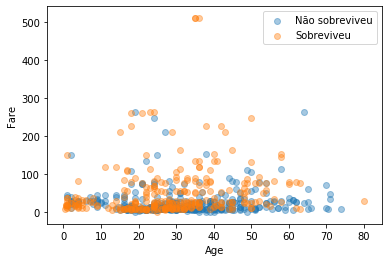

In [7]:
def plot_scatter():
    plt.scatter(x['Age'][y == 0], x['Fare'][y == 0], alpha=.4, label='Não sobreviveu')
    plt.scatter(x['Age'][y == 1], x['Fare'][y == 1], alpha=.4, label='Sobreviveu')
    plt.legend()
    plt.xlabel('Age')
    plt.ylabel('Fare')
plot_scatter()

Agora podemos testar o nosso modelo com algumas pessoas aleatórias.

In [8]:
pessoas = [[20, 500], # pessoa 1
           [75, 100]] # pessoa 2
lr.fit(x, y)
print('Classificações:', lr.predict(pessoas))
print('Probabilidades:\n', lr.predict_proba(pessoas))

Classificações: [1 0]
Probabilidades:
 [[3.92078070e-04 9.99607922e-01]
 [5.06575178e-01 4.93424822e-01]]


O nosso modelo prediz que a primeira pessoa (20 anos, pagou 500) sobreviveu e a segunda (100 anos, pagou 100) não sobreviveu. Além disso, a probabilidade da pessoa 1 sobreviver é de 99%, enquanto a probabilidade da pessoa 2 morrer é de apenas 50,6%.

Abaixo, colocamos essas pessoas junto com o dataset no scatterplot.

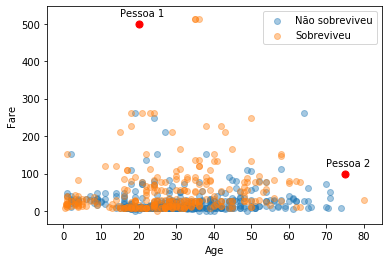

In [9]:
plt.scatter([20, 75], [500, 100], c='red', s=50)
plt.annotate('Pessoa 1', (15, 520))
plt.annotate('Pessoa 2', (70, 120))
plot_scatter()